## Homework 4

### Jaewon Son / 2163284

---

#### **Q1. PCA for Reduced Dimensionality in Clustering**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings

from sklearn import metrics
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score, completeness_score, homogeneity_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

warnings.filterwarnings("ignore")

---

##### Q1.a
1. Load in the image data matrix and the numeric class labels from the segmentation class file. 
2. Using your favorite method, perform min-max normalization on the data matrix.

In [2]:
# File paths
file_path1 = "C:\\Users\\wodnj\\OneDrive\\바탕 화면\\Programming Machine Learning Applications\\DSC 478 - Week 9\\Data File\\segmentation_data.txt"
file_path2 = "C:\\Users\\wodnj\\OneDrive\\바탕 화면\\Programming Machine Learning Applications\\DSC 478 - Week 9\\Data File\\segmentation_classes.txt"
file_path3 = "C:\\Users\\wodnj\\OneDrive\\바탕 화면\\Programming Machine Learning Applications\\DSC 478 - Week 9\\Data File\\segmentation_names.txt"

# Load the datasets
data_df = pd.read_csv(file_path1, delimiter = ",", header = None)
class_df = pd.read_csv(file_path2, delimiter = r"\s+", header = None, names = ["Class Label", "Numeric Class Label"])
names_df = pd.read_csv(file_path3, header = None)

print("Shape of Data Dataframe:", data_df.shape)
print("Shape of Class Dataframe:", class_df.shape)
print("Shape of Name Dataframe:", names_df.shape)

Shape of Data Dataframe: (2100, 19)
Shape of Class Dataframe: (2100, 2)
Shape of Name Dataframe: (19, 1)


In [3]:
# Perform min-max normalization
scaler = MinMaxScaler()
normalized_data_df = pd.DataFrame(scaler.fit_transform(data_df), columns = data_df.columns)
print(normalized_data_df.head())

         0         1    2    3    4         5         6         7         8   \
0  0.430830  0.741667  0.0  0.0  0.0  0.034221  0.000672  0.027329  0.000856   
1  0.335968  0.733333  0.0  0.0  0.0  0.038023  0.000726  0.032298  0.000541   
2  0.885375  0.970833  0.0  0.0  0.0  0.115970  0.002213  0.067081  0.001097   
3  0.181818  0.920833  0.0  0.0  0.0  0.043726  0.001265  0.022360  0.000645   
4  0.379447  0.729167  0.0  0.0  0.0  0.039924  0.000697  0.026087  0.000725   

         9         10        11        12        13        14        15  \
0  0.090111  0.079417  0.061119  0.130943  0.731343  0.014118  0.872865   
1  0.095791  0.085089  0.068483  0.134840  0.729478  0.023529  0.859583   
2  0.085463  0.075365  0.061856  0.120031  0.736940  0.038824  0.827324   
3  0.088562  0.080227  0.059647  0.127046  0.748134  0.014118  0.855787   
4  0.108701  0.101297  0.078056  0.148090  0.748134  0.010588  0.861480   

         16        17        18  
0  0.123711  0.508139  0.831849  


---

##### Q1.b
1. Using the Kmeans implementation in scikit-learn, perform clustering on the image data.
2. Print the cluster centroids.
3. To evaluate the clusters, perform silhouette analysis on the clusters.
4. Compare the 7 clusters to the 7 pre-assigned classes by computing the completeness and homogeneity values of the generated clusters.

In [4]:
# Perform KMeans Clustering with K = 7
kmeans = KMeans(n_clusters = 7, random_state = 42) # Initialize the K-Means clustering
kmeans.fit(normalized_data_df) # Fit the model

  File "c:\Users\wodnj\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KMeans(n_clusters=7, random_state=42)

In [5]:
# Predict the clusters
clusters = kmeans.predict(normalized_data_df)
clusters_df = pd.DataFrame(clusters, columns = ["Cluster"]) 
print(clusters_df.value_counts()) # Count the number of occurrences of each cluster label

Cluster
3          336
4          332
5          309
1          300
0          297
6          290
2          236
Name: count, dtype: int64


In [6]:
# Print the cluster centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = data_df.columns)
print(centroids)

         0         1    2         3         4         5         6         7   \
0  0.513994  0.808937  0.0  0.077441  0.005051  0.054474  0.001407  0.046335   
1  0.535099  0.150167  0.0  0.027778  0.001667  0.030228  0.000543  0.026766   
2  0.302506  0.530862  0.0  0.052260  0.046610  0.100817  0.009420  0.083972   
3  0.251212  0.393366  0.0  0.075397  0.019345  0.078009  0.004436  0.062256   
4  0.748274  0.532041  0.0  0.039157  0.037651  0.113530  0.018922  0.107311   
5  0.769063  0.425930  0.0  0.014024  0.022654  0.039702  0.002983  0.023116   
6  0.254150  0.459382  0.0  0.026437  0.013793  0.036790  0.002031  0.026610   

         8         9         10        11        12        13        14  \
0  0.001401  0.108790  0.091403  0.092414  0.142676  0.679161  0.079002   
1  0.000587  0.823246  0.779716  0.894170  0.788761  0.270665  0.666373   
2  0.011043  0.400608  0.370347  0.472461  0.353036  0.497146  0.570882   
3  0.005348  0.147286  0.137358  0.184210  0.117524  0.7183

In [7]:
# Perform the silhouette analysis
silhouettes_score = silhouette_score(normalized_data_df, clusters)
print(f'Overall Mean Silhouette Value: {silhouettes_score:.4f}')

Overall Mean Silhouette Value: 0.3320


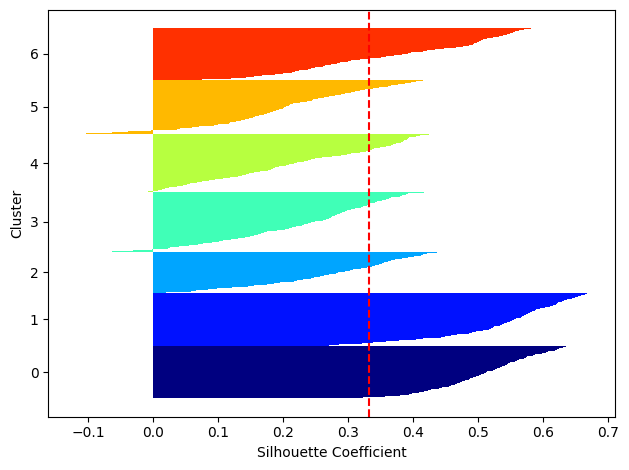

In [8]:
# Visualize the silhouette scores
def plot_silhouettes(data, clusters):
    
    # Get the unique cluster labels and the number of clusters
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    # Calculate the silhouette values
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric = 'euclidean')
    
    # Initialize variables to track the lower and upper bounds
    c_ax_lower, c_ax_upper = 0, 0

    # List to store the tick positions for cluster labels
    cticks = []

    for i, k in enumerate(cluster_labels):

        # Get the silhouette values for the current cluster 'k'
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()

        # Calculate the upper bound
        c_ax_upper += len(c_silhouette_vals)

        # Plot the horizontal bars for the current cluster's silhouette values
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height = 1.0, edgecolor = 'none', color = color)

        # Append the center position for the current cluster
        cticks.append((c_ax_lower + c_ax_upper) / 2)

        # Update the lower bound
        c_ax_lower += len(c_silhouette_vals)
    
    # Calculate the average silhouette score
    silhouette_avg = np.mean(silhouette_vals)

    # Plot a vertical line at the average silhouette score
    plt.axvline(silhouette_avg, color = "red", linestyle = "--") 
    plt.yticks(cticks, cluster_labels)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette Coefficient')
    plt.tight_layout()
    plt.show()
    
    return

plot_silhouettes(normalized_data_df, clusters)

In [9]:
# Extract true labels from the dataset
true_labels = class_df['Numeric Class Label'].values

# Compute completeness and homogeneity
completeness = completeness_score(true_labels, clusters)
homogeneity = homogeneity_score(true_labels, clusters)

print(f"Completeness Score: {completeness:.4f}")
print(f"Homogeneity Score: {homogeneity:.4f}")

Completeness Score: 0.6117
Homogeneity Score: 0.6100


---

##### Q1.c
1. Do experiments with the number of clusters to see if a different value of K results in more cohesive clustering based on Silhouette analysis.
2. Provide a brief discussion of why this particular clustering was selected.

In [10]:
# Visualize the silhouette scores for each instance
def plot_silhouettes(data, clusters):
    
    # Get the unique cluster labels and the number of clusters
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    # Calculate the silhouette values
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric = 'euclidean')
    
    # Initialize variables to track the lower and upper bounds
    c_ax_lower, c_ax_upper = 0, 0

    # List to store the tick positions for cluster labels
    cticks = []

    for i, k in enumerate(cluster_labels):

        # Get the silhouette values for the current cluster 'k'
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()

        # Calculate the upper bound
        c_ax_upper += len(c_silhouette_vals)

        # Plot the horizontal bars for the current cluster's silhouette values
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height = 1.0, edgecolor = 'none', color = color)

        # Append the center position for the current cluster
        cticks.append((c_ax_lower + c_ax_upper) / 2)

        # Update the lower bound
        c_ax_lower += len(c_silhouette_vals)
    
    # Calculate the average silhouette score
    silhouette_avg = np.mean(silhouette_vals)

    # Plot a vertical line at the average silhouette score
    print("Overall Mean Silhouette Value:", str(silhouette_avg))
    plt.axvline(silhouette_avg, color = "red", linestyle = "--") 
    plt.yticks(cticks, cluster_labels)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette Coefficient')
    plt.tight_layout()
    plt.show()
    
    return

The Number of Clusters: 3
Overall Mean Silhouette Value: 0.31607537653884554


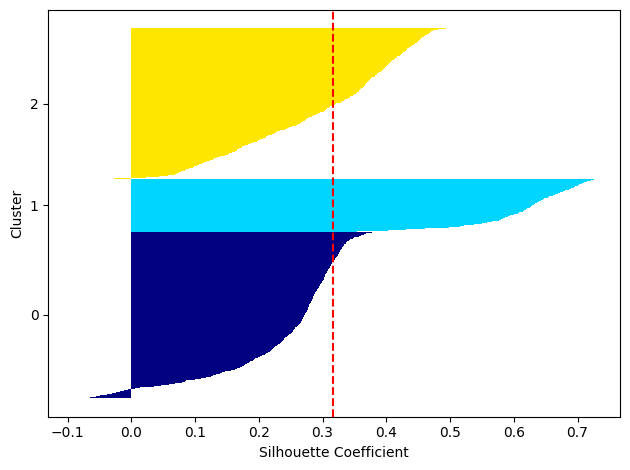

The Number of Clusters: 4
Overall Mean Silhouette Value: 0.38160981543092376


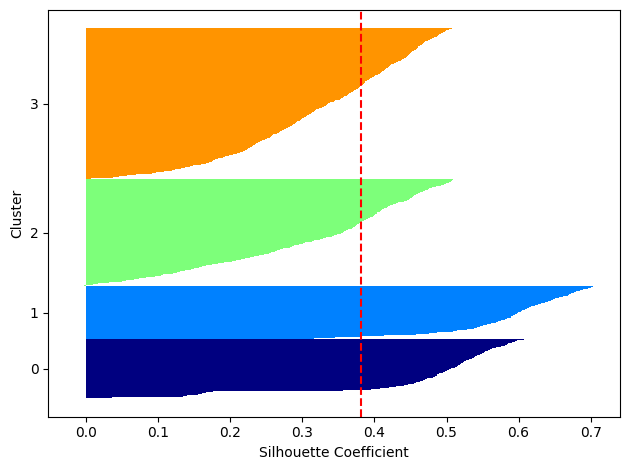

The Number of Clusters: 5
Overall Mean Silhouette Value: 0.3439432996271734


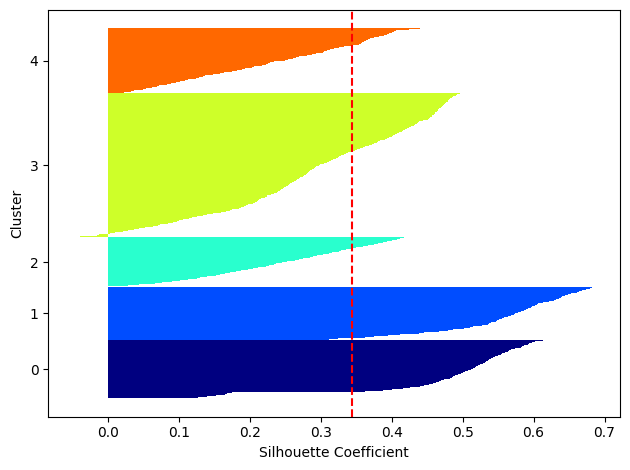

The Number of Clusters: 6
Overall Mean Silhouette Value: 0.3282149107946421


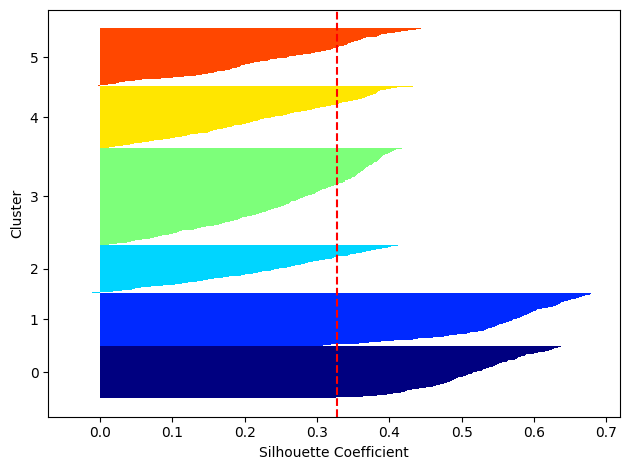

The Number of Clusters: 7
Overall Mean Silhouette Value: 0.3320233761933512


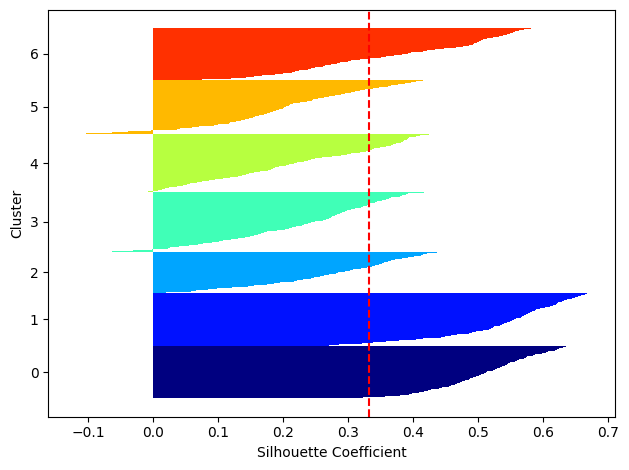

The Number of Clusters: 8
Overall Mean Silhouette Value: 0.29823524229079373


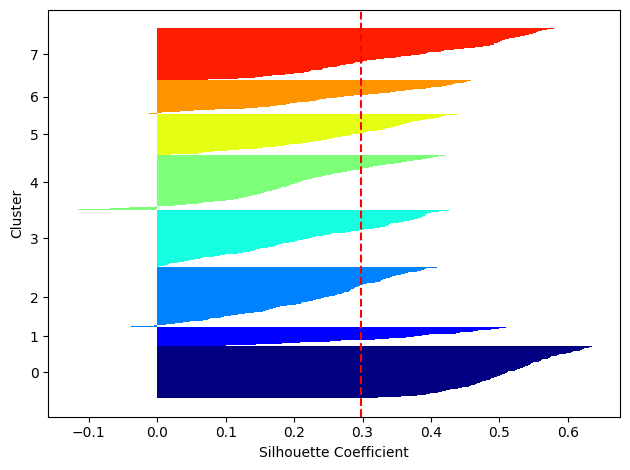

The Number of Clusters: 9
Overall Mean Silhouette Value: 0.30627092069787015


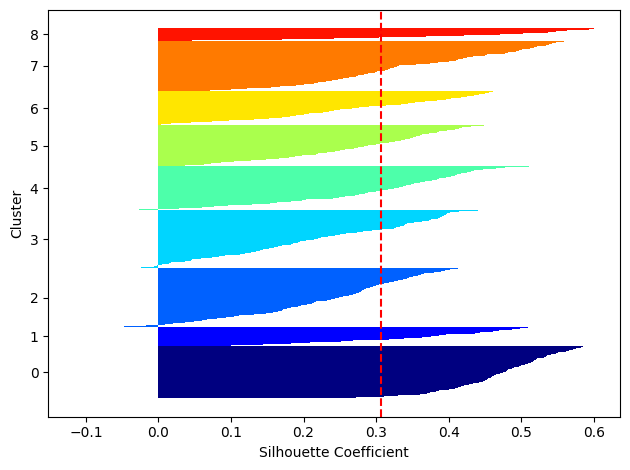

The Number of Clusters: 10
Overall Mean Silhouette Value: 0.2902174041012197


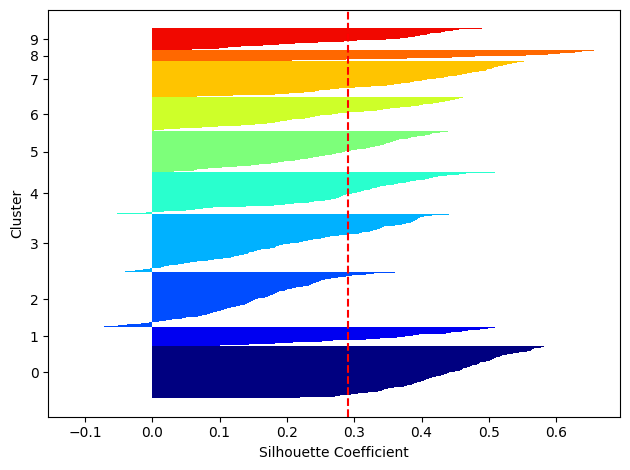

In [11]:
for k in range(3, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(normalized_data_df)
    clusters = kmeans.predict(normalized_data_df)
    print("The Number of Clusters:", str(k))
    plot_silhouettes(normalized_data_df, clusters)

Based on the silhouette score, 4 clusters provide the best result with the highest average silhouette score of 0.3816. This result indicates that the clustering with K = 4 is the most cohesive compared to other values of K.

---

##### Q1.d
1. Perform PCA on the normalized image data matrix.
2. Analyze the principal components to determine the number of PCs needed to capture at least 95% of variance in the data. 
3. Provide a Scree plot of PC variances.
4. Use these r components as features to transform the data into a reduced-dimension space.

In [12]:
# Perform PCA
pca = PCA().fit(normalized_data_df)

In [13]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_) # Calculate the cumulative explained variance
r = np.argmax(cumulative_explained_variance >= 0.95) + 1 # Find the number of components that explain at least 95% of the variance
print(f"Number of principal components to explain at least 95% of variance: {r}")

Number of principal components to explain at least 95% of variance: 7


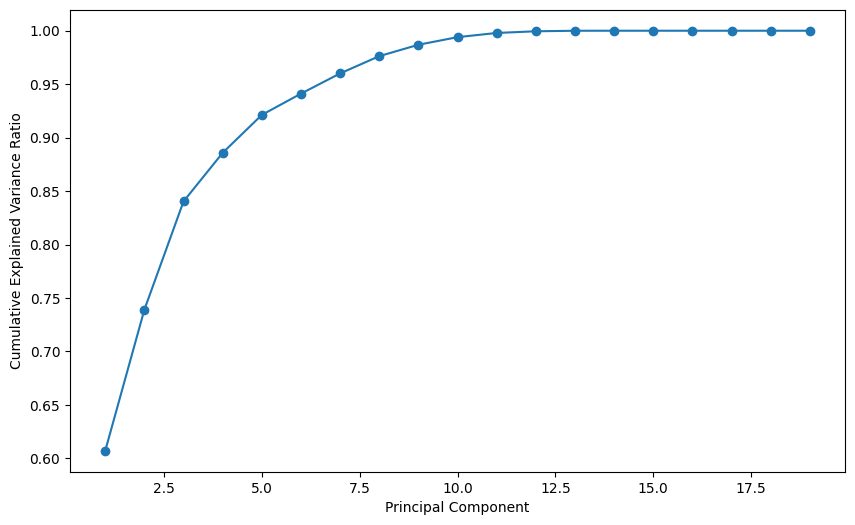

In [14]:
# Plot the cumulative explained variance ratio
plt.figure(figsize = (10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker = 'o')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [15]:
# Perform dimensionality reduction with r principal components
pca = PCA(n_components = r)
pca_data = pca.fit_transform(normalized_data_df)
pca_data_df = pd.DataFrame(pca_data, columns = [f'PC{i + 1}' for i in range(r)])
print(pca_data_df.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7
0 -0.689082  0.532951  0.246098 -0.197812 -0.076433  0.047804 -0.047321
1 -0.666920  0.510675  0.337972 -0.174381 -0.041178  0.056551 -0.041707
2 -0.712027  0.770944 -0.155822 -0.009299 -0.166622  0.043814 -0.060695
3 -0.732419  0.505378  0.496928 -0.056917 -0.144469  0.026348 -0.097034
4 -0.642317  0.531329  0.300672 -0.177615 -0.018240  0.054663 -0.055545


---

##### Q1.e
1. Perform Kmeans on the lower dimensional transformed data.
2. Compare Silhouette values as well as completeness and Homogeneity values of the new clusters. 
3. Compare these results with those obtained on the full data in part b. 

In [16]:
# Perform KMeans Clustering with K = 7
kmeans = KMeans(n_clusters = 7, random_state = 42) # Initialize the K-Means clustering
kmeans.fit(pca_data_df) # Fit the model

KMeans(n_clusters=7, random_state=42)

In [17]:
# Predict the clusters
clusters = kmeans.predict(pca_data_df)
clusters_df = pd.DataFrame(clusters, columns = ["Cluster"]) 
print(clusters_df.value_counts()) # Count the number of occurrences of each cluster label

Cluster
3          550
6          328
2          324
1          300
0          297
4          170
5          131
Name: count, dtype: int64


In [18]:
# Perform the silhouette analysis
silhouettes_score = silhouette_score(normalized_data_df, clusters)
print(f'Overall Mean Silhouette Value: {silhouettes_score:.4f}')

Overall Mean Silhouette Value: 0.3185


In [19]:
# Extract true labels from the dataset
true_labels = class_df['Numeric Class Label'].values

# Compute completeness and homogeneity
completeness = completeness_score(true_labels, clusters)
homogeneity = homogeneity_score(true_labels, clusters)

print(f"Completeness Score: {completeness:.4f}")
print(f"Homogeneity Score: {homogeneity:.4f}")

Completeness Score: 0.6695
Homogeneity Score: 0.6401


**Original Data**
- Overall Mean Silhouette Value: 0.3320
- Completeness Score: 0.6117
- Homogeneity Score: 0.6100

**Lower Dimensional Transformed Data**
- Overall Mean Silhouette Value: 0.3185
- Completeness Score: 0.6695
- Homogeneity Score: 0.6401

Using PCA for dimensionality reduction led to better completeness and homogeneity scores. This implies that the reduced data clustering provides more cohesive and accurate clustering.


---

#### **Q2. Item-Based Joke Recommendation**

In [20]:
# Import library
import pandas as pd
import numpy as np

from numpy import linalg as la

---

##### Q2.a
1. Load in the joke ratings data and the joke text data into appropriate data structures.
2. Use the "recommend" function to provide top 5 joke recommendations for users with id 4 using both Pearson and cosine similarity measures.
3. Find the top 5 recommendations for user with id 25 only with Pearson similarity using both the standard estimator and the SVD-based version to generate these recommendations.

In [21]:
# File paths
file_path1 = "C:\\Users\\wodnj\\OneDrive\\바탕 화면\\Programming Machine Learning Applications\\DSC 478 - Week 9\\Data File\\jokes.csv"
file_path2 = "C:\\Users\\wodnj\\OneDrive\\바탕 화면\\Programming Machine Learning Applications\\DSC 478 - Week 9\\Data File\\modified_jester_data.csv"

# Load the 'jokes' dataset
jokes = pd.read_csv(file_path1, header = None)
jokes = np.array(jokes[1])

# Load the 'modified_jester_data' dataset
ratings = np.genfromtxt(file_path2, delimiter = ',')
ratings = np.mat(ratings)

print(jokes.shape)
print(ratings.shape)

(100,)
(1000, 100)


In [22]:
# Function to calculate the Pearson Similarity
def pearsonSim(inA, inB):

    if len(inA) < 3:
        return 1.0
    
    return 0.5 + 0.5 * np.corrcoef(inA, inB, rowvar = 0)[0][1]

In [23]:
# Function to calculate the Cosine Similarity
def cosineSim(inA, inB):

    num = float((inA.T * inB)[0, 0])
    denom = la.norm(inA) * la.norm(inB)
    
    return 0.5 + 0.5 * (num / denom)

In [24]:
# Function to estimate a user's rating for a specific item using similarity
def standEst(dataMat, user, simMeas, item):

    n = np.shape(dataMat)[1]
    simTotal = 0.0
    ratSimTotal = 0.0
    data = np.mat(dataMat)
    
    for j in range(n):
        userRating = data[user, j]
        
        if userRating == 0:
            continue
        
        overLap = np.nonzero(np.logical_and(data[:, item] > 0, data[:, j] > 0))[0]
        
        if len(overLap) == 0:
            similarity = 0
        
        else:
            similarity = simMeas(data[overLap, item], data[overLap, j])

        simTotal += similarity
        ratSimTotal += similarity * userRating

    if simTotal == 0:
        return 0
    
    else:
        return ratSimTotal / simTotal

In [25]:
# Function to estimate a user's rating for a specific item using Singular Value Decomposition
def svdEst(dataMat, user, simMeas, item):

    n = np.shape(dataMat)[1]
    k = 4
    simTotal = 0.0
    ratSimTotal = 0.0
    data = np.mat(dataMat)
    U, Sigma, VT = la.svd(data)
    Sig_k = np.mat(np.eye(k) * Sigma[:k])
    xformedItems = data.T * U[:, :k] * Sig_k.I
    
    for j in range(n):
        userRating = data[user, j]

        if userRating == 0 or j == item:
            continue
        
        similarity = simMeas(xformedItems[item, :].T, xformedItems[j, :].T)
        simTotal += similarity
        ratSimTotal += similarity * userRating

    if simTotal == 0:
        return 0
    
    else:
        return ratSimTotal / simTotal

In [26]:
# Function to recommend items for a user based on estimated ratings
def recommend(dataMat, user, N, simMeas, estMethod):

    unratedItems = np.nonzero(dataMat[user, :].A == 0)[1]
    
    if len(unratedItems) == 0:
        return 'You rated everything'
    
    itemScores = []
    
    for item in unratedItems:
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        itemScores.append((item, estimatedScore))
    
    return sorted(itemScores, key = lambda jj: jj[1], reverse = True)[:N]

In [27]:
# Provide top 5 joke recommendations using Pearson similarity
top_recommendations_with_pearson_similarity = recommend(ratings, 4, 5, pearsonSim, standEst)

print('Top 5 Jokes for User 4')
print('===========================================================')
for id, predicted_rating in top_recommendations_with_pearson_similarity:
    print()
    print(f"ID: {id}, Predicted Rating: {predicted_rating:.4f}")
    print("Joke:", jokes[id])

Top 5 Jokes for User 4

ID: 71, Predicted Rating: 14.4134
Joke: On the first day of college the Dean addressed the students pointing out some of the rules:"The female dormitory will be out-of-bounds for all male students and the male dormitory to the female students. Anybody caught breaking this rule will be fined $20 the first time." He continued "Anybody caught breaking this rule the second time will be fined $60. Being caught a third time will cost you a fine of $180. Are there any questions ?"At this point a male student in the crowd inquired:"How much for a season pass ?"

ID: 75, Predicted Rating: 14.3973
Joke: There once was a man and a woman that both  got in  a terrible car wreck. Both of their vehicles  were completely destroyed buy fortunately no one  was   hurt.  In thankfulness the woman said to the man 'We are both okay so we should celebrate. I have   a  bottle of wine in my car let's open it.' So the woman got the bottle out of the car and  handed it to the man. The man

In [28]:
# Provide top 5 joke recommendations using Cosine similarity
top_recommendations_with_cosine_similarity = recommend(ratings, 4, 5, cosineSim, standEst)

print('Top 5 Jokes for User 4')
print('===========================================================')
for id, predicted_rating in top_recommendations_with_cosine_similarity:
    print()
    print(f"ID: {id}, Predicted Rating: {predicted_rating:.4f}")
    print("Joke:", jokes[id])

Top 5 Jokes for User 4

ID: 71, Predicted Rating: 14.2938
Joke: On the first day of college the Dean addressed the students pointing out some of the rules:"The female dormitory will be out-of-bounds for all male students and the male dormitory to the female students. Anybody caught breaking this rule will be fined $20 the first time." He continued "Anybody caught breaking this rule the second time will be fined $60. Being caught a third time will cost you a fine of $180. Are there any questions ?"At this point a male student in the crowd inquired:"How much for a season pass ?"

ID: 75, Predicted Rating: 14.2936
Joke: There once was a man and a woman that both  got in  a terrible car wreck. Both of their vehicles  were completely destroyed buy fortunately no one  was   hurt.  In thankfulness the woman said to the man 'We are both okay so we should celebrate. I have   a  bottle of wine in my car let's open it.' So the woman got the bottle out of the car and  handed it to the man. The man

In [29]:
# Provide top 5 joke recommendations using similarity
top_recommendations_using_similarity = recommend(ratings, 25, 5, pearsonSim, standEst)

print('Top 5 Jokes for User 25')
print('===========================================================')
for id, predicted_rating in top_recommendations_using_similarity:
    print()
    print(f"ID: {id}, Predicted Rating: {predicted_rating:.4f}")
    print("Joke:", jokes[id])

Top 5 Jokes for User 25

ID: 99, Predicted Rating: 15.3247
Joke: Q: What's the difference between greeting a Queen and greeting thePresident of the United  States?A: You only have to get on one knee to greet the queen.

ID: 71, Predicted Rating: 15.3243
Joke: On the first day of college the Dean addressed the students pointing out some of the rules:"The female dormitory will be out-of-bounds for all male students and the male dormitory to the female students. Anybody caught breaking this rule will be fined $20 the first time." He continued "Anybody caught breaking this rule the second time will be fined $60. Being caught a third time will cost you a fine of $180. Are there any questions ?"At this point a male student in the crowd inquired:"How much for a season pass ?"

ID: 97, Predicted Rating: 15.3221
Joke: Age and Womanhood1. Between the ages of 13 and 18 ... She is like Africa virgin and unexplored. 2. Between the ages of 19 and 35 ... She is like Asia hot and exotic. 3. Between th

In [30]:
# Provide top 5 joke recommendations using Singular Value Decomposition
top_recommendations_using_svd = recommend(ratings, 25, 5, pearsonSim, svdEst)

print('Top 5 Jokes for User 25')
print('===========================================================')
for id, predicted_rating in top_recommendations_using_svd:
    print()
    print(f"ID: {id}, Predicted Rating: {predicted_rating:.4f}")
    print("Joke:", jokes[id])

Top 5 Jokes for User 25

ID: 3, Predicted Rating: 15.2771
Joke: Q. What's the difference between a man and a toilet? A. A toilet doesn't follow you around after you use it.

ID: 79, Predicted Rating: 15.2381
Joke: Hillary Bill Clinton and the Pope are sitting together on an airplane. Bill says "I could throw one thousand dollar bill out of this plane and make one person very happy."Hillary says "I could throw 10 hundred dollar bills out of the plane and make 10 people very happy."The Pope chips in and says "I could throw Bill out of the airplane and make the whole country happy."

ID: 72, Predicted Rating: 15.2092
Joke: Q: What is the difference between George  Washington Richard Nixon and Bill Clinton? A: Washington couldn't tell a lie Nixon couldn't   tell the truth andClinton doesn't know the difference.

ID: 71, Predicted Rating: 15.1850
Joke: On the first day of college the Dean addressed the students pointing out some of the rules:"The female dormitory will be out-of-bounds for a

---

##### Q2.b
1. Complete the definition for the function "test".
2. Use this function to perform evaluation comparing MAE results using the rating prediction function "standEst" with results using the "svdEst" prediction function.

In [31]:
# Function to perform cross-validation for a specific user by simulating missing ratings and comparing estimated ratings with actual ratings
def cross_validate_user(dataMat, user, test_ratio, estMethod, simMeas):

	dataMat = np.array(dataMat)
	number_of_items = np.shape(dataMat)[1]
	rated_items_by_user = np.array([i for i in range(number_of_items) if dataMat[user, i] > 0])
	test_size = int(test_ratio * len(rated_items_by_user))
	test_indices = np.random.randint(0, len(rated_items_by_user), test_size)
	withheld_items = rated_items_by_user[test_indices]
	original_user_profile = np.copy(dataMat[user])
	dataMat[user, withheld_items] = 0
	error_u = 0.0
	count_u = len(withheld_items)

	for item in withheld_items:
		estimatedScore = estMethod(dataMat, user, simMeas, item)
		error_u = error_u + abs(estimatedScore - original_user_profile[item])	
	
	for item in withheld_items:
		dataMat[user, item] = original_user_profile[item]

	return error_u, count_u

In [32]:
# Function to perform testing of a recommendation system using cross-validation
def test(dataMat, test_ratio, estMethod, simMeas):
    
    # Initialize total error and total test cases
    total_error = 0.0
    total_test_cases = 0

    # Get the number of users
    num_users = np.shape(dataMat)[0]
    
    for user in range(num_users):
        
        # Call cross_validate_user function
        user_error, user_test_cases = cross_validate_user(dataMat, user, test_ratio, standEst, pearsonSim)
        
        # Accumulate the error and the number of test cases
        total_error += user_error
        total_test_cases += user_test_cases
    
    # Calculate the Mean Absolute Error
    mae = total_error / total_test_cases
    
    return mae

In [33]:
# Perform evaluation 
mae_with_standEst = test(ratings, 0.2, standEst, pearsonSim)
mae_with_svdEst = test(ratings, 0.2, svdEst, pearsonSim)

print(f"Mean Absolute Error with standEst: {mae_with_standEst:.4f}")
print(f"Mean Absolute Error with svdEst: {mae_with_svdEst:.4f}")

Mean Absolute Error with standEst: 3.6927
Mean Absolute Error with svdEst: 3.6816


---

##### Q2.c
1. Write a new function "print_most_similar_jokes" which outputs the most similar jokes to a specified query joke. 
2. Test the function by showing the top 3 most similar jokes to joke with id 9 using Pearson similarity and Cosine similarity.

In [34]:
# Function to find the most similar jokes to a specified query joke
def print_most_similar_jokes(dataMat, jokes, queryJoke, k, metric):

    # Extract the ratings vector for the query joke
    query_ratings = dataMat[:, queryJoke]
    
    # Initialize a list to store similarity values
    similarities = []
    
    for i in range(dataMat.shape[1]):

        # Calculate the similarity between queryJoke and joke i
        if i != queryJoke:
            sim_score = metric(query_ratings, dataMat[:, i])
            similarities.append((i, sim_score))  

    # Sort in decreasing order
    similarities.sort(key = lambda x: x[1], reverse = True)

    print(f"Query Joke ID: {queryJoke}")
    print(f"Query Joke: {jokes[queryJoke]}")
    print()
    print('===========================================================')
    print()
    print(f"Top {k} Most Similar Jokes to the Query Joke")
    for i in range(k):
        id, similarity = similarities[i]
        print()
        print(f"ID: {id}")
        print("Joke:", jokes[id])
        print(f"Similarity: {similarity:.4f}")

In [35]:
# Show the top 3 most similar jokes to joke with ID 9 using Pearson similarity
print_most_similar_jokes(ratings, jokes, 9, 3, pearsonSim)

Query Joke ID: 9
Query Joke: Two cannibals are eating a clown one turns to other and says: "Does this taste funny to you? 


Top 3 Most Similar Jokes to the Query Joke

ID: 21
Joke: A duck walks into a pharmacy and asks for a condom. The pharmacist says"Would you like me to stick that on your bill?"The duck says: "What kind of duck do you think I am!"
Similarity: 0.7614

ID: 10
Joke: Q. What do a hurricane a tornado and a redneck divorce all have in common? A. Someone's going to lose their trailer...
Similarity: 0.7584

ID: 54
Joke: A woman has twins and gives them up for adoption.  One of them goes to a family in Egypt and is named "Amal."  The other goes to a  family in Spain; they name him "Juan."  Years later Juan sends a picture of himself to his mom.  Upon receiving the picture she tells her husband that she wishes she also had a picture of Amal.  Her husband responds "But they are twins-if you've seen Juan you've seen   Amal.
Similarity: 0.7541


In [36]:
# Show the top 3 most similar jokes to joke with ID 9 using Cosine similarity
print_most_similar_jokes(ratings, jokes, 9, 3, cosineSim)

Query Joke ID: 9
Query Joke: Two cannibals are eating a clown one turns to other and says: "Does this taste funny to you? 


Top 3 Most Similar Jokes to the Query Joke

ID: 10
Joke: Q. What do a hurricane a tornado and a redneck divorce all have in common? A. Someone's going to lose their trailer...
Similarity: 0.9290

ID: 37
Joke: May I take your order? the waiter asked. "Yes how do you prepare your chickens?" "Nothing special sir" he replied. "We just tell them straight out that they're going to die."
Similarity: 0.9284

ID: 21
Joke: A duck walks into a pharmacy and asks for a condom. The pharmacist says"Would you like me to stick that on your bill?"The duck says: "What kind of duck do you think I am!"
Similarity: 0.9269


---

##### Q2.d
1. Develop an item-based collaborative filtering recommender that uses a model-based approach. 
2. Demonstrate that the function works by computing predicted ratings for users 4 and 25, using k = 10, on top two items recommended to each user on part a.

In [37]:
# Function to compute the item-item similarity matrix
def compute_similarity_matrix(dataMat, simMeas):
    
    # Get the number of items
    num_items = dataMat.shape[1]

    # Initialize a similarity matrix
    similarity_matrix = np.zeros((num_items, num_items))
    
    # Compute similarity between item i and item j
    for i in range(num_items):
        for j in range(i, num_items):
            similarity = simMeas(dataMat[:, i], dataMat[:, j])
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity
    
    return similarity_matrix

In [38]:
# Function to predict a user's rating for a specific item using the similarity matrix
def predict_rating(dataMat, target_user, item, k, similarity_matrix):

    # Get the target user's ratings vector and convert it to a 1D array
    user_ratings = np.array(dataMat[target_user, :]).flatten()

    # Get the similarity values between the target item and all other items
    item_similarities = similarity_matrix[item, :]

    # Sort items in descending order
    top_k_similar_items = np.argsort(item_similarities)[::-1][:k]
    
    # Initialize variables to store values
    weighted_sum = 0.0
    similarity_sum = 0.0

    # Compute the weighted rating and absolute similarity
    for similar_item in top_k_similar_items:
        if user_ratings[similar_item] > 0: # Check if the user has rated
            weighted_sum += item_similarities[similar_item] * user_ratings[similar_item]
            similarity_sum += abs(item_similarities[similar_item])
    
    if similarity_sum == 0:
        return 0
    
    # Calculate the predicted rating
    predicted_rating = weighted_sum / similarity_sum

    return predicted_rating

In [39]:
# Compute the item-item similarity matrix with Pearson and Cosine similarity
matrix_with_pearson_similarity = compute_similarity_matrix(ratings, pearsonSim)
matrix_with_cosine_similarity = compute_similarity_matrix(ratings, cosineSim)

In [40]:
# Set a target user, an item, and a value of k
user_id, item, k = 4, 71, 10

In [41]:
# Predict the rating for user 4 on item 71 based on the Pearson similarity
predicted_rating = predict_rating(ratings, user_id, item, k, matrix_with_pearson_similarity)
print(f"User {user_id}'s predicted rating for item {item} with Pearson Similarity: {predicted_rating}")

User 4's predicted rating for item 71 with Pearson Similarity: 14.535270379352133


In [42]:
# Predict the rating for user 4 on item 71 based on the Cosine similarity
predicted_rating = predict_rating(ratings, user_id, item, k, matrix_with_cosine_similarity)
print(f"User {user_id}'s predicted rating for item {item} with Cosine Similarity: {predicted_rating}")

User 4's predicted rating for item 71 with Cosine Similarity: 14.767614903308031


In [43]:
# Set a target user, an item, and a value of k
user_id, item, k = 4, 75, 10

In [44]:
# Predict the rating for user 4 on item 75 based on the Pearson similarity
predicted_rating = predict_rating(ratings, user_id, item, k, matrix_with_pearson_similarity)
print(f"User {user_id}'s predicted rating for item {item} with Pearson Similarity: {predicted_rating}")

User 4's predicted rating for item 75 with Pearson Similarity: 15.291980910639897


In [45]:
# Predict the rating for user 4 on item 75 based on the Cosine similarity
predicted_rating = predict_rating(ratings, user_id, item, k, matrix_with_cosine_similarity)
print(f"User {user_id}'s predicted rating for item {item} with Cosine Similarity: {predicted_rating}")

User 4's predicted rating for item 75 with Cosine Similarity: 15.010723102641744


In [46]:
# Set a target user, an item, and a value of k
user_id, item, k = 25, 99, 10

In [47]:
# Predict the rating for user 25 on item 99 based on the Pearson similarity
predicted_rating = predict_rating(ratings, user_id, item, k, matrix_with_pearson_similarity)
print(f"User {user_id}'s predicted rating for item {item} with Pearson Similarity: {predicted_rating}")

User 25's predicted rating for item 99 with Pearson Similarity: 0


In [48]:
# Predict the rating for user 25 on item 99 based on the Cosine similarity
predicted_rating = predict_rating(ratings, user_id, item, k, matrix_with_cosine_similarity)
print(f"User {user_id}'s predicted rating for item {item} with Cosine Similarity: {predicted_rating}")

User 25's predicted rating for item 99 with Cosine Similarity: 0


In [49]:
# Set a target user, an item, and a value of k
user_id, item, k = 25, 71, 10

In [50]:
# Predict the rating for user 25 on item 71 based on the Pearson similarity
predicted_rating = predict_rating(ratings, user_id, item, k, matrix_with_pearson_similarity)
print(f"User {user_id}'s predicted rating for item {item} with Pearson Similarity: {predicted_rating}")

User 25's predicted rating for item 71 with Pearson Similarity: 13.82


In [51]:
# Predict the rating for user 25 on item 71 based on the Cosine similarity
predicted_rating = predict_rating(ratings, user_id, item, k, matrix_with_cosine_similarity)
print(f"User {user_id}'s predicted rating for item {item} with Cosine Similarity: {predicted_rating}")

User 25's predicted rating for item 71 with Cosine Similarity: 13.820000000000002
